In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import os

import mne
from mne.io import read_raw_ctf
from mne.simulation import simulate_evoked
from mne.evoked import combine_evoked
from sklearn.preprocessing import normalize
from load_dataset import *

In [2]:
def load_raw_data(path):
    # data path to the ctf data
    raw = mne.io.read_raw_ctf(path, preload=True)
    return raw

In [3]:
ds_name = 'anonepi_08.ds'
file_path = os.path.join(os.getcwd(), '..', 'data/'+ds_name)
raw = load_raw_data(file_path)

ds directory : /Users/mlion0200/GitRepo/bcni_epi/notebook/../data/anonepi_08.ds
    res4 data read.
    hc data read.
    Separate EEG position data file not present.
    Quaternion matching (desired vs. transformed):
       0.50   79.46    0.00 mm <->    0.50   79.46    0.00 mm (orig :  -48.62   63.18 -269.35 mm) diff =    0.000 mm
      -0.50  -79.46   -0.00 mm <->   -0.50  -79.46   -0.00 mm (orig :   59.62  -53.18 -269.12 mm) diff =    0.000 mm
     104.42    0.00    0.00 mm <->  104.42    0.00    0.00 mm (orig :   75.92   71.48 -230.19 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
Picked positions of 21 EEG channels from channel info
    21 EEG locations added to Polhemus data.
    Measurement info composed.
Finding samples for /Users/mlion0200/GitRepo/bcni_epi/notebook/../data/anonepi_08.ds/anonepi_08.meg4: 
    System clock channel is available, checking which sample

In [24]:
ds_list = ['anonepi_08.ds']
epochs, epochs_array, labels_array = load_all_data_from_list(ds_list, window_size=0.2, b_drop_channels=False)

Start loading data...
From dataset: anonepi_08.ds
ds directory : /Users/mlion0200/GitRepo/bcni_epi/notebook/../data/anonepi_08.ds
    res4 data read.
    hc data read.
    Separate EEG position data file not present.
    Quaternion matching (desired vs. transformed):
       0.50   79.46    0.00 mm <->    0.50   79.46    0.00 mm (orig :  -48.62   63.18 -269.35 mm) diff =    0.000 mm
      -0.50  -79.46   -0.00 mm <->   -0.50  -79.46   -0.00 mm (orig :   59.62  -53.18 -269.12 mm) diff =    0.000 mm
     104.42    0.00    0.00 mm <->  104.42    0.00    0.00 mm (orig :   75.92   71.48 -230.19 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
Picked positions of 21 EEG channels from channel info
    21 EEG locations added to Polhemus data.
    Measurement info composed.
Finding samples for /Users/mlion0200/GitRepo/bcni_epi/notebook/../data/anonepi_08.ds/anonepi_08.meg4: 
    System

In [25]:
print(epochs)

<Epochs  |  n_events : 13 (all good), tmin : -0.1 (s), tmax : 0.1 (s), baseline : None, ~2.8 MB, data loaded,
 'negative': 7, 'positive': 6>


<Evoked  |  comment : 'positive', kind : average, time : [-0.100000, 0.100000], n_epochs : 6, n_channels x n_times : 183 x 121, ~801 kB>


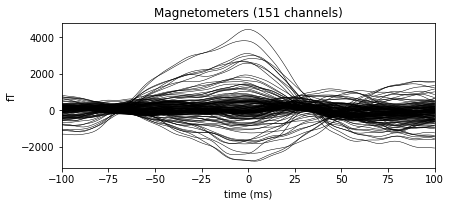

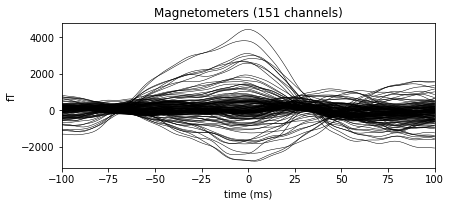

In [26]:
evoked_pos = epochs['positive'].average()
print(evoked_pos)
evoked_pos.plot()

<Evoked  |  comment : 'negative', kind : average, time : [-0.100000, 0.100000], n_epochs : 7, n_channels x n_times : 183 x 121, ~801 kB>


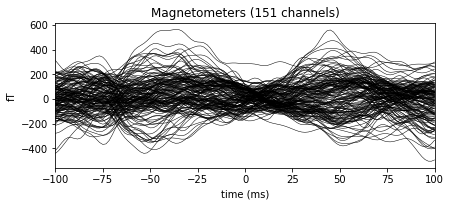

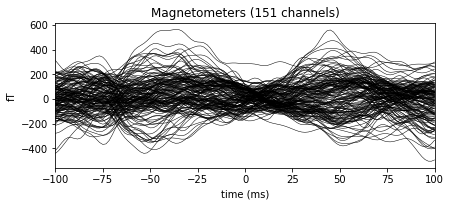

In [27]:
evoked_neg = epochs['negative'].average()
print(evoked_neg)
evoked_neg.plot()

In [28]:
sphere = mne.make_sphere_model(r0=(0., 0., 0.), head_radius=None)
mne.viz.plot_alignment(raw.info, subject='sample', meg='helmet', bem=sphere, dig=True, surfaces=['brain'])

SystemExit: This program needs access to the screen. Please run with a
Framework build of python, and only when you are logged in
on the main display of your Mac.

/Users/mlion0200/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [29]:
noise_path = 'MEG_Noise_20061102_01.ds'
file_path = os.path.join(os.getcwd(), '..', 'data/'+noise_path)
raw_erm = read_raw_ctf(file_path, preload=True).apply_gradient_compensation(0)
#channels = ['BG1-2511', 'BG2-2511', 'BG3-2511', 'BP1-2511', 'BP2-2511', 'BP3-2511', 'BQ1-2511', 'BQ2-2511', 'BQ3-2511', 'BR1-2511', 'BR2-2511', 'BR3-2511', 'G12-2511', 'G13-2511', 'G23-2511', 'P12-2511', 'P13-2511', 'Q12-2511', 'Q13-2511', 'Q21-2511', 'Q23-2511', 'R12-2511', 'R13-2511', 'R23-2511', 'SCLK01-177', 'G11-2511', 'G22-2511', 'P11-2511', 'P22-2511', 'Q11-2511', 'Q22-2511', 'R11-2511', 'R22-2511']
#raw_erm = raw_erm.drop_channels(channels)
raw_erm.resample(600, npad="auto")
mf_kwargs = dict(origin=(0., 0., 0.), st_duration=10.)
raw_erm = mne.preprocessing.maxwell_filter(raw_erm, coord_frame='meg', **mf_kwargs)
cov = mne.compute_raw_covariance(raw_erm)

ds directory : /Users/mlion0200/GitRepo/bcni_epi/notebook/../data/MEG_Noise_20061102_01.ds
    res4 data read.
    hc data read.
    Separate EEG position data file read.
    Quaternion matching (desired vs. transformed):
       0.00   80.00    0.00 mm <->    0.00   80.00    0.00 mm (orig :  -56.57   56.57 -270.00 mm) diff =    0.000 mm
       0.00  -80.00    0.00 mm <->    0.00  -80.00    0.00 mm (orig :   56.57  -56.57 -270.00 mm) diff =    0.000 mm
      80.00    0.00    0.00 mm <->   80.00   -0.00    0.00 mm (orig :   56.57   56.57 -270.00 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
    Measurement info composed.
Finding samples for /Users/mlion0200/GitRepo/bcni_epi/notebook/../data/MEG_Noise_20061102_01.ds/MEG_Noise_20061102_01.meg4: 
    System clock channel is available, checking which samples are valid.
    50 x 2048 = 102400 samples from 184 chs
Current compensa

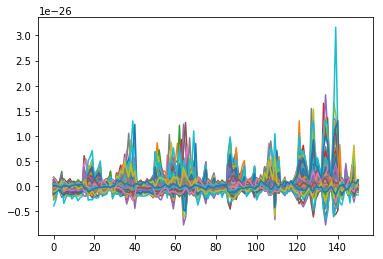

In [30]:
plt.plot(cov.data)

In [31]:
dip, residual = mne.fit_dipole(evoked_pos, cov, sphere)

BEM               : <ConductorModel  |  Sphere (no layers): r0=[0.0, 0.0, 0.0] mm>
Sphere model      : origin at (   0.00    0.00    0.00) mm, max_rad =    0.1 mm
Guess grid        :   20.0 mm
Guess mindist     :    5.0 mm
Guess exclude     :   20.0 mm
Using standard MEG coil definitions.

Coordinate transformation: head -> MRI (surface RAS)
     1.000000  0.000000  0.000000       0.00 mm
     0.000000  1.000000  0.000000       0.00 mm
     0.000000  0.000000  1.000000       0.00 mm
     0.000000  0.000000  0.000000       1.00
Coordinate transformation: MEG device -> head
     0.999345 -0.036159  0.001447       0.69 mm
     0.032994  0.926835  0.374015      22.75 mm
    -0.014865 -0.373723  0.927421      76.27 mm
     0.000000  0.000000  0.000000       1.00
0 bad channels total
Read 151 MEG channels from info
Read  32 MEG compensation channels from info
81 coil definitions read
Coordinate transformation: MEG device -> head
     0.999345 -0.036159  0.001447       0.69 mm
     0.032994  

In [32]:
print('Estimated pos:  %s mm' % np.array_str(dip.pos[0] * 1000, precision=1))

Estimated pos:  [-40.4   0.5  75.3] mm


In [33]:
print('GOF:            %0.1f %%' % dip.gof[0])

GOF:            79.8 %


In [36]:
fwd, stc = mne.make_forward_dipole(dip, sphere, evoked_pos.info)

Positions (in meters) and orientations
121 sources
Source space          : <SourceSpaces: [<discrete, n_used=121, coordinate_frame=head>]>
MRI -> head transform : identity
Measurement data      : instance of Info
Sphere model      : origin at [ 0.  0.  0.] mm
Standard field computations
Do computations in head coordinates
Free source orientations

Read 1 source spaces a total of 121 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     1.000000  0.000000  0.000000       0.00 mm
     0.000000  1.000000  0.000000       0.00 mm
     0.000000  0.000000  1.000000       0.00 mm
     0.000000  0.000000  0.000000       1.00

Read 151 MEG channels from info
Read  32 MEG compensation channels from info
81 coil definitions read
Coordinate transformation: MEG device -> head
     0.999345 -0.036159  0.001447       0.69 mm
     0.032994  0.926835  0.374015      22.75 mm
    -0.014865 -0.373723  0.927421      76.27 mm
     0.000000  0.000000  0.000000       1.00
10 compen

In [40]:
pred_evoked = simulate_evoked(fwd, stc, evoked_pos.info, cov=None, nave=np.inf)

The maximum current magnitude is 476.2 nAm, which is very large. Are you trying to apply the forward model to dSPM values? The result will only be correct if currents are used.
Projecting source estimate to sensor space...
[done]


<ipython-input-40-bdbd2805b1ed>:1: RuntimeWarning: The maximum current magnitude is 476.2 nAm, which is very large. Are you trying to apply the forward model to dSPM values? The result will only be correct if currents are used.
  pred_evoked = simulate_evoked(fwd, stc, evoked_pos.info, cov=None, nave=np.inf)


Highest GOF 94.7% at t=-8.3 ms with confidence volume 0.0 cm^3
Failed to locate mag channel positions from layout. Inferring channel positions from data.


<ipython-input-48-41365e697e0c>:13: RuntimeWarning: Failed to locate mag channel positions from layout. Inferring channel positions from data.
  evoked_pos.plot_topomap(time_format='Measured field', axes=axes[0], **plot_params)


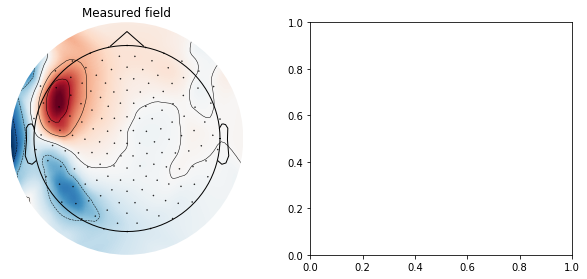

Failed to locate mag channel positions from layout. Inferring channel positions from data.


<ipython-input-48-41365e697e0c>:16: RuntimeWarning: Failed to locate mag channel positions from layout. Inferring channel positions from data.
  pred_evoked.plot_topomap(time_format='Predicted field', axes=axes[1], **plot_params)


<Figure size 432x288 with 0 Axes>

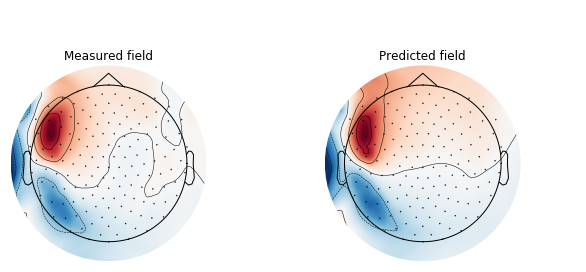

In [48]:
# find time point with highest GOF to plot
best_idx = np.argmax(dip.gof)
best_time = dip.times[best_idx]
print('Highest GOF %0.1f%% at t=%0.1f ms with confidence volume %0.1f cm^3'
      % (dip.gof[best_idx], best_time * 1000,
         dip.conf['vol'][best_idx] * 100 ** 3))
# remember to create a subplot for the colorbar
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[10., 3.4])
vmin, vmax = -100, 100  # make sure each plot has same colour range

# first plot the topography at the time of the best fitting (single) dipole
plot_params = dict(times=best_time, ch_type='mag', outlines='skirt', colorbar=False)
evoked_pos.plot_topomap(time_format='Measured field', axes=axes[0], **plot_params)

# compare this to the predicted field
pred_evoked.plot_topomap(time_format='Predicted field', axes=axes[1], **plot_params)